<center>
<a href="https://www.tse-fr.eu/" ><img src="https://upload.wikimedia.org/wikipedia/commons/5/52/TSE_Logo_2019.png" style="float:left; width: "200"; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Machine learning scenario](https://github.com/wikistat/Apprentissage)

# GRC: Prediction of a bank product appetancy with <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> and <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Summary
The dataset is built with 825 customers of a bank, described by 32 variables. These variables give some informations about the bank use. Our goal is to predict a score for the Visa Premier card: we intend to compare several methods of machine learning (logistic regression, trees, extreme gradient boosting, svm or random forests).

## Introduction

### Data presentation
#### Variables
The variables are listed below. 
*Table: name and meaning of variables* Beware, some variables are written in capital letters and then in small letters after some transformations (logarithm, one hot encoding, etc). Names ending with L correspond to variables that are logarithmically transformed while names ending with Q or q correspond to qualitative variables. . 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**


**Answer the questions with the help of Python and Scikitlearn.**

## Data preparation
### Lecture 
The original dataset has been transformed after an important preprocessing step in this [notebook](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb). We skip this step today! 

In [1]:
# Library Importation
import numpy as np
import socket
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
#from google.colab import files
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
# Lecture of the data frame
#files.upload()

vispremv = pd.read_table( 'vispremv.dat', delimiter = ' ' )
#Give the size of the dataset

In [ ]:
vispremv.head()

In [ ]:
# Produce a list of quantitative variables
vispremv.describe()

Verify that most of the variables are described by a quantitative and a qualitative version.

Qualitative variables  (sexe, csp, famille)  are transformed into quantitative ones except `CARVP`. How? 

In [ ]:
vispremv.dtypes

In [4]:
vispremv = vispremv.loc[:,~vispremv.columns.duplicated() ]

In [5]:
# Transformation of qualitative variables into quantitative 0/1 ones.
# Use pd.get_dummies

vispremDum = pd.get_dummies( vispremv[['SEXEQ', 'FAMIQ', 'PCSPQ']] ) 
vispremDum

vispremDum.drop( ['SEXEQ_Sfem', 'FAMIQ_Fseu'], axis = 1, inplace = True )

vispremNum = vispremDum.select_dtypes( exclude = ['object'] )

vispremR = pd.concat([vispremDum, vispremNum], axis = 1 )

print(vispremR.columns)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad',
       'PCSPQ_Pemp', 'PCSPQ_Pint', 'PCSPQ_Pouv', 'PCSPQ_Psan'],
      dtype='object')


In [ ]:
vispremR.isnull().sum()

** **texte en gras**Q** How many samples and how many variables?

In [ ]:
#TODO Compute the number of samples and the number of variables

vispremR.shape

In [6]:
# The variable CARVP is modified into 0/1
y = vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

In [7]:
vispremv["CARVP"] = vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

### Extraction of the learning and test set

In [8]:
rd_seed = 111 # Modify this sieve initialization
npop = len(vispremv)
#TODO Find xApp,xTest,yApp,yTest with the help of train_test_split
#We will place 200 samples in the test set
from sklearn.preprocessing import StandardScaler
xApp,xTest, yApp, yTest = train_test_split( vispremR , y, test_size = 200, random_state = rd_seed )

xApp.shape

(863, 14)

In [ ]:
vispremv.shape

## [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
This "old" method is still commonly used, mainly because of its simplicity, interpretability and diffusion over years.

### Estimation and optimization
The model selection procedure involves a statistical penalization: *ridge*, Lasso or a combination of both (*elastic net*). The behaviour of the model selection in Python is not exactly comparable with the one used in R (*stepwise, backward, forward*) that optimizes *AIC*

#### *Lasso* Optimization


We first consider the **Lasso** penalty, which is proportional to the L1 norm of the  ou la pénalité est proportionnelle à la norme 1 de l'estimateur (ce qui parameter we are looking for. This penalty induces sparsity of the response coefficient vector.

We recall that the logistic regression model defined within our framework aims at estimating the conditional probability that a card-owner possesses the set of attributes $X$=$x$ (e.g. up to 10 months of consumer seniority, with at most 50 transfers per months on average, at most 2 life insurances etc..). The underlying parametric assumption states that, in our sample, the conditional odds of owning a card i.e., $ \frac{P(Y=1|X)}{1-P(Y=1|X)}$ has a logit linear in $X$ (see below):

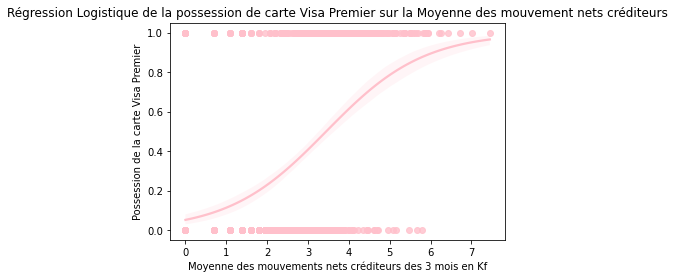

In [11]:
import seaborn as sns
#sns.regplot( x = vispremv['ITAVCL'], y = vispremv['CARVP'], data = vispremv, logistic = True )
sns.set_palette("husl", 3)
sns.color_palette("husl", 3)
ax = sns.regplot( x = vispremv['MOYRVL'], y = vispremv['CARVP'], data = vispremv, logistic = True, color= 'pink' )
sns.axes_style("whitegrid")
ax.set( xlabel = "Moyenne des mouvements nets créditeurs des 3 mois en Kf", ylabel = "Possession de la carte Visa Premier" )
plt.title("Régression Logistique de la possession de carte Visa Premier sur la Moyenne des mouvement nets créditeurs")
plt.show(ax)

,SEXEQ,CARVP
0,Sfem,0.139303
1,Shom,0.455371


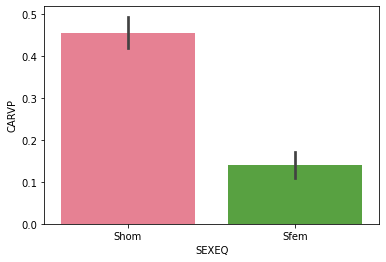

In [12]:
sns.barplot( x = vispremv['SEXEQ'],y = vispremv['CARVP'] , data = vispremv )
vispremv.groupby( 'SEXEQ' ,as_index = False ).CARVP.mean()

We observe a substantial over-representation of male card-owners in our sample (i.e., 45% versus 14% of for males and females respectively), it can potentially gives rationale for results of our models throughout the following sections.

In [13]:
vispremv.corr()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
RELAT,1.000000,0.379882,0.064888,0.214777,0.249508,0.126643,0.117589,0.044892,0.056658,0.073264,...,0.220438,0.213878,0.169615,0.173697,0.150623,-0.019603,0.272643,0.307121,0.005465,-0.045189
AGER,0.379882,1.000000,0.078152,0.207690,0.200717,0.092824,0.084364,0.014104,0.090800,0.046301,...,0.047471,0.094836,0.158785,0.206184,0.007075,-0.101598,0.257008,0.256945,-0.027979,0.118632
OPGNBL,0.064888,0.078152,1.000000,0.492103,0.133642,0.191050,0.296850,0.176681,0.222123,0.319572,...,0.121592,0.134393,0.146853,0.148657,0.170622,0.012927,0.221971,0.170435,0.194434,0.285980
MOYRVL,0.214777,0.207690,0.492103,1.000000,0.373422,0.317355,0.455462,0.247835,0.357448,0.482495,...,0.259134,0.288905,0.341304,0.381314,0.515586,0.005469,0.513791,0.291548,0.286197,0.443863
TAVEPL,0.249508,0.200717,0.133642,0.373422,1.000000,0.141537,0.138215,0.002225,0.123355,0.087370,...,0.579756,0.712218,0.599411,0.718242,0.219111,-0.100534,0.675886,0.386200,-0.110554,0.142631
ENDETL,0.126643,0.092824,0.191050,0.317355,0.141537,1.000000,0.821748,0.318204,0.617301,0.274219,...,0.192354,0.140048,0.092086,0.086091,0.211867,-0.024130,0.123932,0.129283,0.238501,0.128460
GAGETL,0.117589,0.084364,0.296850,0.455462,0.138215,0.821748,1.000000,0.544828,0.677055,0.363998,...,0.220336,0.149099,0.139990,0.101268,0.313753,-0.032795,0.090745,0.159005,0.382724,0.287284
GAGECL,0.044892,0.014104,0.176681,0.247835,0.002225,0.318204,0.544828,1.000000,0.252202,0.229298,...,0.065125,0.024167,0.066214,0.001105,0.227573,0.007579,-0.120843,0.070261,0.458538,0.234214
GAGEML,0.056658,0.090800,0.222123,0.357448,0.123355,0.617301,0.677055,0.252202,1.000000,0.265906,...,0.174508,0.146462,0.090581,0.066198,0.247356,-0.021650,0.126111,0.104032,0.282986,0.251796
KVUNB,0.073264,0.046301,0.319572,0.482495,0.087370,0.274219,0.363998,0.229298,0.265906,1.000000,...,0.135961,0.128988,0.144475,0.141517,0.328210,0.019315,0.214381,0.115959,0.304726,0.297697


In [14]:
vispremv.corr().unstack().sort_values( ascending = False ).drop_duplicates()

RELAT   RELAT     1.000000
MOYRVL  QCREDL    0.931287
YLVNB   YLVMTL    0.846740
BOPPNL  QCREDL    0.844869
XLGMTL  XLGNB     0.836020
                    ...   
ITAVCL  GAGECL   -0.120843
CARVP   NPTAG    -0.124327
QSMOY   GAGECL   -0.137718
ITAVCL  JNBJDL   -0.140939
QSMOY   JNBJDL   -0.203584
Length: 407, dtype: float64

<AxesSubplot:>

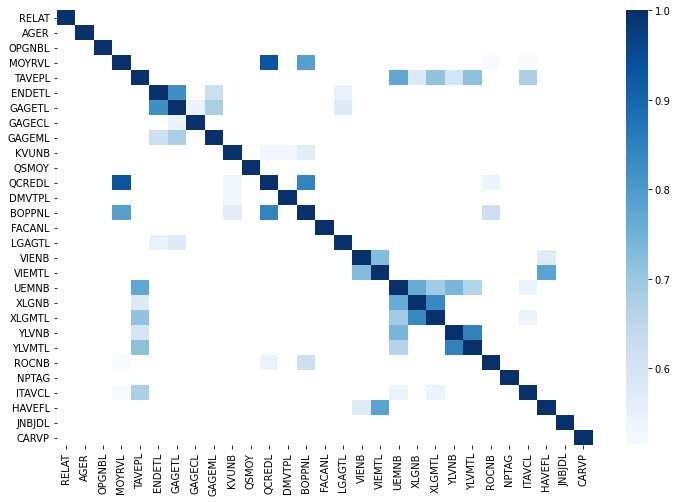

In [15]:
corr = vispremv.corr()
kot = corr[abs( corr ) >= .5]
plt.figure( figsize = ( 12,8 ) )
sns.heatmap( kot, cmap = "Blues" )

In [16]:
import statsmodels.api as sm
logit_model = sm.Logit( yApp ,xApp.loc[:,~xApp.columns.duplicated()] )
result = logit_model.fit( maxiter = 500, method = 'nm' )
print( result.summary2() )

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.184     
Dependent Variable: CARVP            AIC:              911.8644  
Date:               2021-09-27 17:59 BIC:              945.1873  
No. Observations:   863              Log-Likelihood:   -448.93   
Df Model:           6                LL-Null:          -550.23   
Df Residuals:       856              LLR p-value:      5.3104e-41
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     500.0000                                     
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
SEXEQ_Shom    1.0609    0.1810    5.8604  0.0000   0.7061   1.4157
FAMIQ_Fcou   -0.5783    0.1744   -3.3152  0.0009  -0.9202  -0.2364
PCSPQ_Pcad    2.5033    0.8577    2.9186  0.0035   0.8222   4.1843
PCSPQ_Pemp   -0.3987    0.2304

C:\Users\Poste-PC\miniconda3\envs\math4ml\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
xTest

,SEXEQ_Shom,FAMIQ_Fcou,PCSPQ_Pcad,PCSPQ_Pemp,PCSPQ_Pint,PCSPQ_Pouv,PCSPQ_Psan,SEXEQ_Shom,FAMIQ_Fcou,PCSPQ_Pcad,PCSPQ_Pemp,PCSPQ_Pint,PCSPQ_Pouv,PCSPQ_Psan
571101,0,1,0,0,0,0,1,0,1,0,0,0,0,1
5060351,1,1,0,0,1,0,0,1,1,0,0,1,0,0
1055422,1,0,0,0,0,0,1,1,0,0,0,0,0,1
2447030,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3244536,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241325,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3462789,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3244235,1,1,0,1,0,0,0,1,1,0,1,0,0,0
561871,0,1,0,0,0,1,0,0,1,0,0,0,1,0


With the classic logistic regression method, the matrix of predictors $X$ is not singular because of high correlation (see below) and is thus not invertible. The gradient descent estimates are not consistent and we need to used to a penalyzed version of the logistic regression using Lasso or Ridge.  

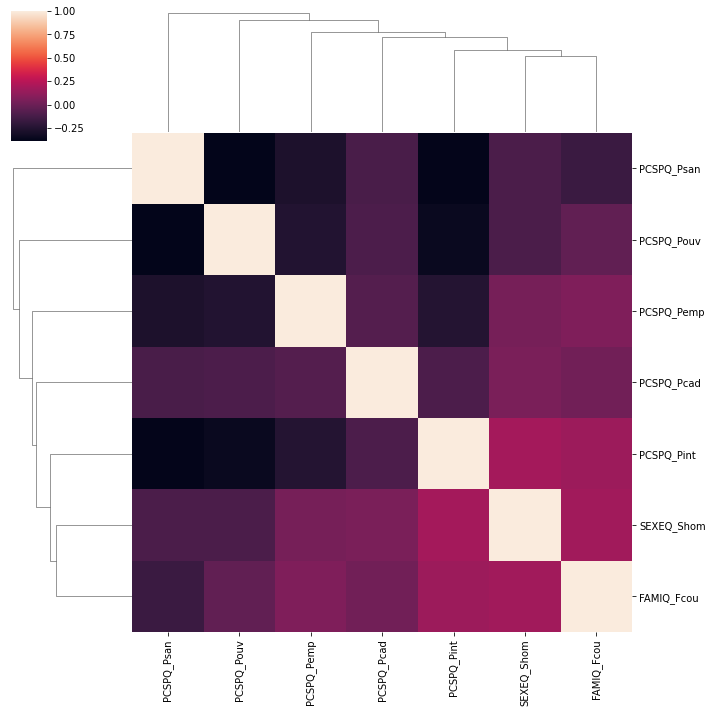

In [18]:
import seaborn as sns
sns.clustermap( xApp.loc[:,~xApp.columns.duplicated() ].corr() )

We hereby fit a Lasso Logit Regression Model in order to reduce the number of regressors considered in the prediction of Visa credit card ownership.
In particular, the objective loss function is equal to the negative log-likelihood function $L(X;\beta)$ added to a regularization parameter $\lambda$ controling for the $X$ matricial size $p$ with the $L_1$ norm. The minimization problem thus involves the estimation of the new parameter $\lambda$ prior to the predictors parameters $\beta$.

$min_{\lambda, \beta} S(\lambda;\beta) = L(X;\beta) + \lambda|\beta|_{1}$ $\space \space \space \space \space \space \space \space \space (1.1)$

where $ L(X;\beta) = -log(\prod_{i:Y_i = 1} p(X_i) \prod_{j:Y_j = 0} (1-p(X_j)) $
and $p(X)=\frac{e^{X^T\beta}}{1 + e^{X^T\beta}}$ 

which is equivalent to minimizing the cross-entropy loss function.
Thanks to the log-transformation of the likelihood function, we recover a convex optimization problem that can be solved using gradient descent methods.

The Lasso thus shrinks the $\beta$ coefficient estimates towards zero, with some of those coefficient estimates being exactly equal to zero when $\lambda$ goes to infinity. Provided that $\lambda$ is chosen appropriately, the Lasso estimator $\hat\beta(\lambda)$ is consistent. The method yields a $sparse$ model that calls for a cross-validation of the $\lambda$ parameter estimate.

The $k$-folded cross-validation consists in defining a grid of possible values for the $\lambda$ parameter to explore, partitioning the training sample in $k=5$ sub-samples and fitting the loss function in (1.1) for a fixed value of $\lambda$ on all partitions but partition $k$. For each value of $\lambda$ defined by the grid, we sum the five residuals obtained, one cell of the grid at a time. We then compute the residuals sum of squares on the $ Grid(\lambda) $ and minimize such convex function with respect to $\lambda$.

To conclude, the Lasso coefficient can be thought as a constraint optimization program's solution. Indeed, it exactly corresponds to the vector of $p$ estimates that lead to the smallest cross-entropy, subject to the constraint that there is a budget $s$ for how large the estimates can be.

In [19]:
from sklearn.linear_model import LogisticRegression
# Grid of penalty parameters
param = [ {"C": [ 0.5, 1, 5, 10, 12, 15, 30 ]} ] # dictionary of the values of C used for GridSearchCV
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l1"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitLasso !

baseline_reg = LogisticRegression( penalty = 'l1',random_state = 0, solver = 'liblinear' ).fit( xApp, yApp )

CV_reg =GridSearchCV(LogisticRegression( penalty = 'l1', solver = 'liblinear' ), param, cv = 5 )
logitLasso = CV_reg.fit( xApp, yApp )


In [ ]:
# Computation of the loss
print("Best learning rate = %f, Best parameter  = %s" %
      ( 1.-logitLasso.best_score_,logitLasso.best_params_ ) )


In [ ]:
CV_reg_2 =GridSearchCV(LogisticRegression( penalty = 'l1', solver = 'saga', max_iter = 5000  ), param, cv = 5 )
logitLasso_2 = CV_reg_2.fit( xApp, yApp )
#StandardScaler().fit_transform( vispremR ), y

In [ ]:
print("Best learning rate = %f, Best parameter  = %s" %
      ( 1.-logitLasso_2.best_score_,logitLasso_2.best_params_ ) )

Prediction error


In [ ]:
# Prediction with the model
yChap = logitLasso.predict( xTest )
# TODO:  compute the  confusion matrix with the help of pd.crosstab
table = pd.crosstab( yChap, yTest )
print( table )

# Error on the test set
print("Test error - Logistic regression  Lasso = %f" % ( 1-logitLasso.score( xTest, yTest ) ) )
# the false negative is the most costly error: we predict no card when the individual actually has one
# loss of a client

#### *Ridge* Optimization 
On considère maintenant l'optimisation Ridge, ou la pénalité est proportionnelle à la norme 2 de l'estimateur (au carré)


In [ ]:
# Grid of penalty parameters
param = [ {"C":[ 0.5,1,5,10,12,15,30 ]} ]
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l2"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitRidge!


baseline_reg_ridge = LogisticRegression( penalty = 'l2',random_state = 0, solver = 'lbfgs', max_iter = 1000 ).fit( xApp, yApp )

CV_reg_ridge = GridSearchCV( LogisticRegression( penalty = 'l2', solver='lbfgs' ), param, cv = 5 )
logitRidge = CV_reg_ridge.fit( xApp, yApp )

In [ ]:
# Error computation  
print("Best score = %f, Best parameter = %s" %
      (1. - logitRidge.best_score_, logitRidge.best_params_))


In [ ]:
# Prediction 
yChap = logitRidge.predict(xTest)

#Todo confusion matrix 


# Error on the test set
print("Erreur de test régression Ridge après validation croisée = %f" % ( 1-logitRidge.score( xTest, yTest ) ) )

In [ ]:
print( "Erreur de test régression Ridge avant validation croisée = %f" % ( 1 - baseline_reg_ridge.score( xTest, yTest ) ) )

In [ ]:
# Prediction with the Ridge model
yChap_ridge = baseline_reg_ridge.predict( xTest )
# TODO:  compute the  confusion matrix with the help of pd.crosstab
table_ridge = pd.crosstab( yChap_ridge, yTest )
print( table_ridge )

# Error on the test set
print("Test error - Logistic regression  Ridge before cross validation = %f" % ( 1-baseline_reg_ridge.score( xTest, yTest ) ) )
# the false negative is the most costly error: we predict no card when the individual actually has one
# loss of a client

In [ ]:
baseline_reg_ridge.get_params

In [ ]:
logitRidge.get_params

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

abs(r2_score(y_pred  = logitRidge.predict(xTest), y_true = yTest))



**Q** Note the prediction errors and compare them with the ones predicted by the cross validation step.

### Interpretation

LassoOpt produced by GridSearchCV does not record the values of the parameters learnt by the model. It is then necessary to launch another time this model with the optimal value of the parameter if we wish to show the values of the coefficients.

In [ ]:
LassoOpt = LogisticRegression(penalty = "l1",C = 12, solver = 'liblinear' )
LassoOpt = LassoOpt.fit( xApp, yApp )
# Storage of the coefficients
vect_coef = np.matrix.transpose( LassoOpt.coef_ )
vect_coef = vect_coef.ravel()
#Show the most important 25 coefficients
coef = pd.Series( abs( vect_coef ),index = xApp.columns ).sort_values( ascending = False ) 
print( coef )

In [ ]:
plt.figure( figsize = ( 7,4 ) )
coef.plot( kind = 'bar' )
plt.title( 'Coeffients' ) 
plt.tight_layout()
plt.show()

**Q** What are the important variables? How to draw some conclusion/interpretation?
The most important variables are the socio-professional categories (i.e. executive), and the sex of the individual (i.e. male). 
Being a male executive thus seems to be highly correlated with card ownership. It is also posible that this first result reflects an overpresentation of male in executive branches. Since executive branches are associated with financial wealth and extensive asset management, it only makes sense to see the wealthiest individuals of the sample as more likely to own credit card. 

**Q** Is the Lasso penalty efficient?

It would be interesting to compare with the *ridge* and *elastic net* model

### ROC Curve

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report


Logit_elastic_net = LogisticRegressionCV( cv = 5, penalty = 'elasticnet', l1_ratios = [0.1, 0.5, 0.9], solver = 'saga', max_iter = 5000  )
Logit_elastic_net.fit( xApp, yApp )

print("Logistic Regression: {} || Elasticnet: {}".format(logitLasso.score( xApp, yApp ), Logit_elastic_net.score( xApp, yApp ) ) )

# Print out some more metrics
print( "Logistic Regression" )
print( classification_report( yApp , logitLasso.predict( xApp ) ) )
print( "Elastic Net" )
print( classification_report( yApp, Logit_elastic_net.predict( xApp ) ) )

In [ ]:
print("Logistic Regression: {} || Elasticnet: {}".format(logitRidge.score( xApp, yApp ), Logit_elastic_net.score( xApp, yApp ) ) )

# Print out some more metrics
print( "Logistic Regression" )
print( classification_report( yApp , logitRidge.predict( xApp ) ) )
print( "Elastic Net" )
print( classification_report( yApp, Logit_elastic_net.predict( xApp ) ) )

In [ ]:
from sklearn.metrics import roc_curve
listMethod = [ ["Lasso",logitLasso],["Ridge",logitRidge] ]

for method in enumerate( listMethod ):
    probas_ = method[1][1].predict_proba( xTest )
    fpr, tpr, thresholds = roc_curve( yTest, probas_[:,1] )
    plt.plot( fpr, tpr, lw=1,label="%s"%method[1][0] )
plt.xlabel( 'False positive rate' )
plt.ylabel( 'True positive rate' )
plt.legend( loc="best" )

plt.show()

## Discriminant analysis
Three methods are availables: parametric ones with LDA-QDA and a non parametric one (*k* nearest neighbor).

In [ ]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

### Linear Discriminant Analysis (LDA)
Estimation of the model (there is no feature selection step) and then prediction over the test set.


<p style='text-align: justify;'

Linear Discriminant Analysis was first proposed by Fisher in 1936 as a method to predict (well separated) $k$ classes, in response to logistic regression model's instabilities. We hereby study the case of a two-category classification problem i.e., card-ownerniship or no. Using Bayes' Theorem to derive the best classifier, i.e., with the lowest possible $total$ error rate out of all classifiers (provided that the Gaussian model is correct): 

$P(Y=1| X=x)$ $= \frac{{\pi_k}{f_k}(x)}{\sum \limits_{l=1}^{K}{{\pi_l}{f_l}}(x) } $ $ \forall k = $  {$0;1$}      $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.1$)


such that 

${\pi_k}$ being the prior probability that a random chosen observation belongs to the class of card-owners coded as $k=1$ 

${f_k}(X)= P(X=x| Y=k)$  being the conditional density function of $X$ for an observation belonging to the $k^{th}$ class $ \forall k = $  {$0;1$}


We thus estimate prior ${\pi_k}$ and the conditional probability density function ${{f_k}}(X)$ by $\hat{\pi_k}$ and  $\hat{{f_k}}(X)$ respectively in order to plug them in the posterior $(1.1)$. 

We assume that the predictors $X$ are normally distributed according to a $N(\mu_k, \Sigma)$ with a class-specific mean-vector of size ($k$x$1$) and homoskedastic, that is, there is a common covariance matrix $\Sigma$ of size ($p$x$p$) across both classes. We plug the resulting multivariate gaussian distribution function in $(1)$ as the $\hat{{f_k}}(X)$.
The unbiased maximum likelihood estimates  $\hat\mu_k$ and $\hat\sigma^2$ for $\mu_k$ and $\sigma^2$ are used to compute ${{f_k}}(X)$ $ \forall k, \space \space  \forall p  $: 


$\hat\mu_{k,p} = \frac{1}{n_k}\sum \limits_{i:y_i =k}{}x_{i,p}$ 

$\hat\Sigma = \frac{1}{n_K}(x_i - \hat\mu_k)^T(x_i - \hat\mu_k)
  \forall k = $  {$0;1$} $ \space \space \space \space \space  \space \space (1.2)$


Naturally, $\hat{\pi_k}$ is equal to the empirical sample share of individual belonging to class $k$:


$\hat{\pi_k}$ = $\frac{n_k}{n} \forall k = $  {$0;1$} $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.3$)


The Bayes classifier thus assigns an observation $X=x$ to the class for which the estimate $\hat{P}(Y=1| X=x)$ is largest (i.e. greater than $1/2$).
Taking the log of ($1.1$) with $\hat{{f_k}}(X)$ and $\hat{\pi_k}$ and simplifying the constant terms yields the following Bayes decision boundary rule: 

"$Assign$ $y_i$ $to$ $k=1$ $\iff$ $2x^T(\mu_1 - \mu_2) + log(\pi_1) - log(\pi_2) \ge {\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2}$ and to $k=0$ otherwise."  ($1.4$)


The Bayes decision boundary thus corresponds to the point where 
$ x= 2(\mu_1 - \mu_2)^{-1}({\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2} -log(\frac{\pi_1}{\pi_2})) = \frac{1}{2}[({\mu_1 + \mu_2})-(\mu_1 - \mu_2)^{-1}({log(\frac{\pi_1}{\pi_2})})]$ $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.5$)

The $LDA$ classifier plugs the estimates given in $(1.2)$ and $(1.3)$ into ($1.4$) in order to assign an observation $X=x$ to the most probable class.

The performance metric of interest here is the test error rate (not be mistaken with the training error rate). We expect the classifier to perform worse if we were to predict a new set of individuals would own credit cards or not. Indeed, the fitting of the model i.e. the parameters estimation is specifically done on the training set. Nonetheles, the train test split has been randomized and the ratio of parameters $p$ to number of samples $n$ as $\rho= \frac{14}{1063}=0.013$ is close to 0 so we do not expect overfitting. 

To that extent, a bank or a credit card company might be particulary sensitive to false negatives, that is, individuals who $are$ card owners but who are misclassified as $non-card$ $owners$ by the $LDA$ classifiers.


It might be that the initial threshold of $50%$ for the posterior probability in the two-class case fails short at meeting such needs. We could instead lower that threshold to say 20% in order to decrease the false negative rate, at the expense of an increase in the false positive rate that is less costly to a bank trying to grow its consumer base







In [ ]:
yApp.size

In [ ]:
yApp[yApp==1]

In [ ]:
def prior(df):
  ratio = df[df==1].size/df.size
  return ratio

In [ ]:
prior(yApp)

In [ ]:
# TODO:
# 1. Define the model ('lda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix
 
lda = discriminant_analysis.LinearDiscriminantAnalysis( solver = 'svd', shrinkage = None, priors = None, n_components = None, store_covariance = False, tol = 0.0001 )
lda.fit(xApp, yApp)
# Prediction on the test set
print("Erreur de test lda = %f" % (1-lda.score(xTest,yTest)))


In [ ]:
lda.explained_variance_ratio_

In [ ]:
pd.DataFrame( confusion_matrix( yTest, lda.predict( xTest ) ) )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( lda, xTest, yTest, display_labels = yTest.values, cmap = plt.cm.Blues )  
plt.show()

**Q** What about the quality of the prediction? The ability of interpret the method?

**Q** What is the meaning of the  *warning*? What are the variables involved by this warning?
### Quadratic Discriminant Analysis

In [ ]:
# Same procedure as the one of LDA for QDA

# TODO:
# 1. Define the model ('qda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix
 
qda = discriminant_analysis.QuadraticDiscriminantAnalysis( tol = 0.0001 )
qda.fit( xApp, yApp )
# Prediction on the test set
print( "Erreur de test lda = %f" % ( 1-qda.score(xTest,yTest ) ) )


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( qda, xTest, yTest, display_labels = xApp.columns, cmap = plt.cm.Pinks, normalize = normlalize )  
plt.show()

### K Nearest Neighbors

In [ ]:
# TODO
# 1. Define the model with the 10 nearest neighbors (use KNeighborsClassifier)
# 2. Fit the model
# 3. Predict on the test set
# 4. Show the confusion matrix 

print(table)
# Prediction error on the test set
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))


In [ ]:
#Optimization of the smoothing parameter (number of neighbors) k
#Grid 
param_grid=[{"n_neighbors":list(range(1,15))}]
disKnn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV is itself an estimator 
# Optimal parameter 
disKnnOpt.best_params_["n_neighbors"]
print("Best score = %f, Best parameter = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

In [ ]:
# Prediction on the test set 
yChap = disKnnOpt.predict(xTest)
# Confusion matrix 
table=pd.crosstab(yChap,yTest)
print(table)

# Estimation of the prediction error on the test set 
print("Error rate of knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

ROC curve

In [ ]:
from sklearn.metrics import roc_curve
# List of the methods 
listMethod=[["lda",disLin],["qda",disQua],["knn",disKnnOpt]]
# Curves computation
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

## [Binary decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
Binary trees are competing well versu logistic regression and are commonly used in datascience. In particular, their interpretation are simple, which is a great advantage of this method. However, the optimization of the parameters involved in this method is somewhat versatile.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define and fit the model
# TODO

**Q** What is the default homogeneity criterion used by this method?

**Q** What is the major drawback of the pruning step in  `Scikkit-learn` when compared to the  `rpart` library in R?

In [ ]:
# Optimization of the depth of the tree
#TODO

# optimal parameter
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))


In [ ]:
# Prediction on the test set
yChap = treeOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)# Prediction error on the test set
print(" Prediction error on the test set = %f" % (1-treeOpt.score(xTest,yTest)))

In [ ]:
# Visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(xApp,yApp)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

In [ ]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Roc curve ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
Comparison of the previous methods

The default threshold   (0.5) is not necessarily the best one, and it is necessary to compare the ROC curves.

In [ ]:
# Liste of the  methods 
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt]]
# Roc curves 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

Comment the results.

**Q** Interest of the logistic regression when compared to the LDA?

**Q** Consequence of the ROC curve crossing on the AUC evaluation?

The size of the test set (200) is modest...

## [Aggregation methods](https://en.wikipedia.org/wiki/Ensemble_learning)
We mainly compare here the three algorthms: *bagging, random forest, boosting*.

### *Bagging*

**Q** What is the default aggregated algorithm? 

**Q** What is the default number of estimators ? Is it necessary to optimize this number?

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag= # Def model (nestim =100)
bagC=bag.fit(xApp, yApp)
# Prediction on the test set
yChap = bagC.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with bagging = %f" % (1-bagC.score(xTest,yTest)))


**Q** Run this previous cell several times. What do you think about the stability of the method and about the its reliability?

### *Random forest*

**Q** What is the parameter to be optimized for this algorithm? What is its default value?

**Q** Is the number of trees a versatile parameter?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Optimization  of max_features
param=[{"max_features":list(range(2,10,1))}]

rf= # TODO DEF gridsearchCV
rfOpt=rf.fit(xApp, yApp)
# optimal parameter 
print("Best score = %f, Best parameter = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = rfOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with  random forest opt -quantitative = %f" % (1-rfOpt.score(xTest,yTest)))

### *Gradient boosting*

**Q** What is the historical *boosting* algorithm? Which one is used now?

**Q** What are the important parameters to be tuned? How to calibrate them??

**Q** What is the default value of the parameter that is not optimized below?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimization of two parameters
paramGrid = [
  {'n_estimators': list(range(100,601,50)), 'learning_rate': [0.1,0.2,0.3,0.4]}
 ]
gbmC= GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1)
gbmOpt=gbmC.fit(xApp, yApp)
# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = gbmOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Test error of gbm opt = %f" % (1-gbmOpt.score(xTest,yTest)))

### Courbes ROC

In [ ]:
# List of the methods
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt],["RF",rfOpt],["GBM",gbmOpt]]
# ROC curves computation 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.legend(loc="best")
send(plt,17)
plt.show()

**Q** What is the best interpretable method? What is the best method?

**Q** What can you say about the *extrem gradient boosting* ? Number of parameters to be tuned? In Python? In R? Its diffusion?

**Exercice** Add the deep learning and SVM family of methods.